In [1]:
import polars as pl
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

from cmocean import cm as cmo
import glidertools as gt

In [2]:
import numpy as np

In [3]:
dat = xr.open_dataset("C:/Users/flapet/OneDrive - NOC/Documents/IDAPro/lib/db_building/data/glider/pomBODCREQ-5915/unit_405/nc_files/L0-timeseries/Biocarbon_doombar.nc", chunks={"time": 1000})

In [4]:
mask = (dat.depth < 400).compute()
dat_surf = dat.where(mask, drop=True)

C:\Users\flapet\OneDrive - NOC\Documents\IDAPro\lib\GliderTools\glidertools\mapping.py:969: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = Series(z).groupby([x, bins])  # -DB put z into the many bins (like 2D hist)


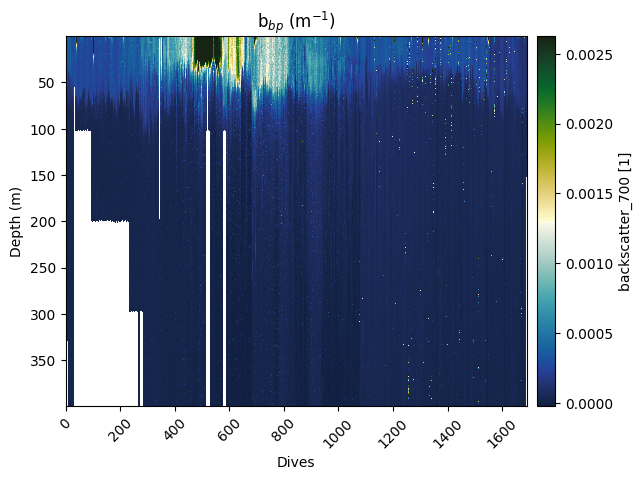

In [5]:
gt.plot(dat_surf['profile_index'], dat_surf['depth'], dat_surf['backscatter_700'], cmap=cmo.delta)
plt.title('b$_{bp}$ (m$^{-1}$)')
plt.show()

C:\Users\flapet\OneDrive - NOC\Documents\IDAPro\lib\GliderTools\glidertools\mapping.py:969: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = Series(z).groupby([x, bins])  # -DB put z into the many bins (like 2D hist)
C:\Users\flapet\OneDrive - NOC\Documents\IDAPro\lib\GliderTools\glidertools\cleaning.py:155: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  median = gridded.rolling(3, axis=1, center=True, min_periods=2).median()
C:\Users\flapet\OneDrive - NOC\Documents\IDAPro\lib\GliderTools\glidertools\helpers.py:76: GliderToolsWarning: Primary input variable is not xr.DataArray data type - no metadata to pass on.
  warnings.warn(msg, category=GliderToolsWarning)
C:\Users\flapet\OneDrive - NOC\Document

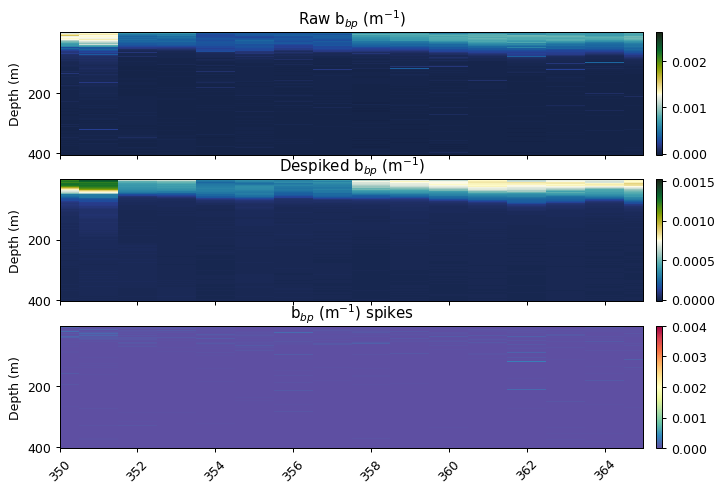

In [6]:
bbp_1d = np.array(dat_surf['backscatter_700'])
prof_1d = np.array(dat_surf['profile_index'])
depth_1d = np.array(dat_surf['pressure'])

nan_mask = np.isnan(depth_1d)
valid_idx = np.where(~nan_mask)[0]  # Indices of non-NaN values
valid_values = depth_1d[valid_idx]   # Non-NaN values
depth_1d[nan_mask] = np.interp(np.where(nan_mask)[0], valid_idx, valid_values)


bbp_horz = gt.cleaning.horizontal_diff_outliers(prof_1d, depth_1d, bbp_1d, depth_threshold=10, mask_frac=0.05)
bbp_baseline, bbp_spikes = gt.cleaning.despike(bbp_horz, 7, spike_method='minmax')


fig, ax = plt.subplots(3, 1, figsize=[9, 6], sharex=True, dpi=90)

gt.plot(prof_1d, depth_1d, bbp_1d, cmap=cmo.delta, ax=ax[0], robust=True)
gt.plot(prof_1d, depth_1d, bbp_baseline, cmap=cmo.delta, ax=ax[1], robust=True)
gt.plot(prof_1d, depth_1d, bbp_spikes, ax=ax[2], cmap=plt.cm.Spectral_r, vmin=0, vmax=0.004)

[a.set_xlabel('') for a in ax]
[a.set_xlim(350, 365) for a in ax]

ax[0].set_title('Raw b$_{bp}$ (m$^{-1}$)')
ax[1].set_title('Despiked b$_{bp}$ (m$^{-1}$)')
ax[2].set_title('b$_{bp}$ (m$^{-1}$) spikes')

plt.show()

In [7]:
dat_surf['bbp700'] = ("time", bbp_baseline)

In [ ]:
mask = (dat_surf.profile_index == 1200).compute()
prof_i = dat_surf.where(mask, drop = True)

bbp_raw = prof_i['backscatter_700']
bbp_despiked = prof_i['bbp700']
depths = prof_i['depth'].compute()

plt.figure(figsize=(8, 6))
plt.plot(bbp_raw, depths, label='Backscatter Raw', color='blue')
plt.plot(bbp_despiked, depths, label='BBP Despiked', color='orange', linestyle='--')

plt.gca().invert_yaxis()  # Depth increases downwards
plt.xlabel("Backscatter / BBP")
plt.ylabel("Depth (m)")
plt.legend()
plt.title("Profile 352: Backscatter vs BBP")
plt.grid(True)
plt.show()


C:\Users\flapet\OneDrive - NOC\Documents\IDAPro\lib\GliderTools\glidertools\mapping.py:969: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = Series(z).groupby([x, bins])  # -DB put z into the many bins (like 2D hist)


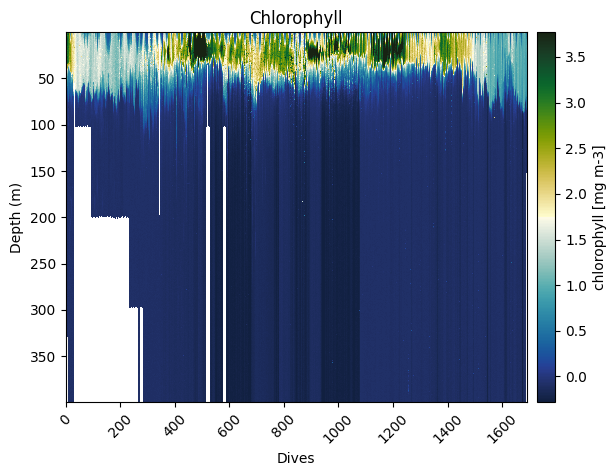

In [10]:
gt.plot(dat_surf['profile_index'], dat_surf['depth'], dat_surf['chlorophyll'], cmap=cmo.delta)
plt.title("Chlorophyll")
plt.show()

In [11]:
flr_iqr = gt.cleaning.outlier_bounds_iqr(dat_surf['chlorophyll'], multiplier=100)

In [12]:
flr_dark = gt.optics.fluorescence_dark_count(flr_iqr, dat_surf.depth)

C:\Users\flapet\OneDrive - NOC\Documents\IDAPro\lib\GliderTools\glidertools\mapping.py:969: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = Series(z).groupby([x, bins])  # -DB put z into the many bins (like 2D hist)


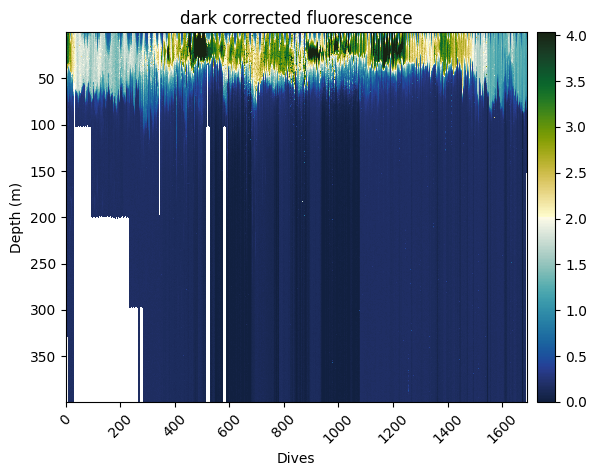

In [13]:
gt.plot(dat_surf['profile_index'], dat_surf['depth'], flr_dark, cmap=cmo.delta, robust=True)
plt.title('dark corrected fluorescence')
plt.show()

C:\Users\flapet\OneDrive - NOC\Documents\IDAPro\lib\GliderTools\glidertools\mapping.py:969: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = Series(z).groupby([x, bins])  # -DB put z into the many bins (like 2D hist)
C:\Users\flapet\OneDrive - NOC\Documents\IDAPro\lib\GliderTools\glidertools\mapping.py:969: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = Series(z).groupby([x, bins])  # -DB put z into the many bins (like 2D hist)


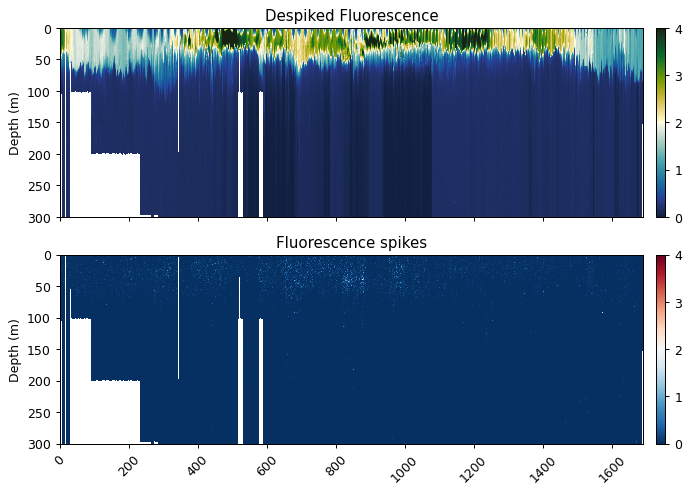

In [36]:
flr_base, flr_spikes = gt.cleaning.despike(flr_dark, 11, spike_method='median')

fig, ax = plt.subplots(2, 1, figsize=[9, 6], sharex=True, dpi=90)

gt.plot(dat_surf['profile_index'], dat_surf['depth'], flr_base, cmap=cmo.delta, ax=ax[0], robust=True)
gt.plot(dat_surf['profile_index'], dat_surf['depth'], flr_spikes, cmap=plt.cm.RdBu_r, ax=ax[1], vmin=0, vmax=4)

[a.set_xlabel('') for a in ax]
[a.set_ylim(300, 0) for a in ax]

ax[0].set_title('Despiked Fluorescence')
ax[1].set_title('Fluorescence spikes')

plt.show()

In [14]:
import glidertools as gt

C:\Users\flapet\OneDrive - NOC\Documents\IDAPro\lib\GliderTools\glidertools\optics.py:462: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bluffton.append(api.wgs84.latlon(grp_avg.lat[i], grp_avg.lon[i]))
C:\Users\flapet\OneDrive - NOC\Documents\IDAPro\lib\GliderTools\glidertools\mapping.py:969: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = Series(z).groupby([x, bins])  # -DB put z into the many bins (like 2D hist)
C:\Users\flapet\OneDrive - NOC\Documents\IDAPro\lib\GliderTools\glidertools\mapping.py:969: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future versio

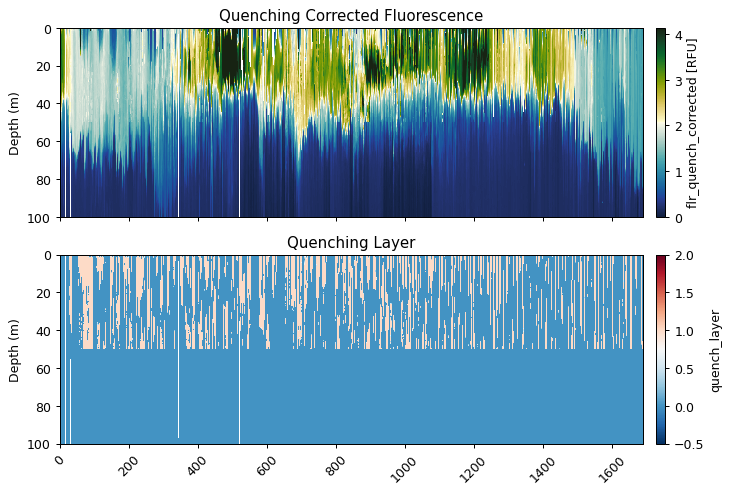

In [38]:
flr_qc, quench_layer = gt.optics.quenching_correction(
    flr_base, dat_surf.bbp700, dat_surf.profile_index, dat_surf.depth, dat_surf.time, dat_surf.latitude, dat_surf.longitude,
    sunrise_sunset_offset=1, night_day_group = True, max_photic_depth = 50)

fig, ax = plt.subplots(2, 1, figsize=[9, 6], sharex=True, dpi=90)

gt.plot(dat_surf['profile_index'], dat_surf['depth'], flr_qc, cmap=cmo.delta, ax=ax[0], robust=True)
gt.plot(dat_surf['profile_index'], dat_surf['depth'], quench_layer, cmap=plt.cm.RdBu_r, ax=ax[1], vmin=-.5, vmax=2)

[a.set_xlabel('') for a in ax]
[a.set_ylim(100, 0) for a in ax]

ax[0].set_title('Quenching Corrected Fluorescence')
ax[1].set_title('Quenching Layer')

plt.show()

C:\Users\flapet\OneDrive - NOC\Documents\IDAPro\lib\GliderTools\glidertools\mapping.py:969: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = Series(z).groupby([x, bins])  # -DB put z into the many bins (like 2D hist)
C:\Users\flapet\OneDrive - NOC\Documents\IDAPro\lib\GliderTools\glidertools\mapping.py:969: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = Series(z).groupby([x, bins])  # -DB put z into the many bins (like 2D hist)
C:\Users\flapet\OneDrive - NOC\Documents\IDAPro\lib\GliderTools\glidertools\mapping.py:969: FutureWarning: The default of observed=False is deprecated and will be changed to Tr

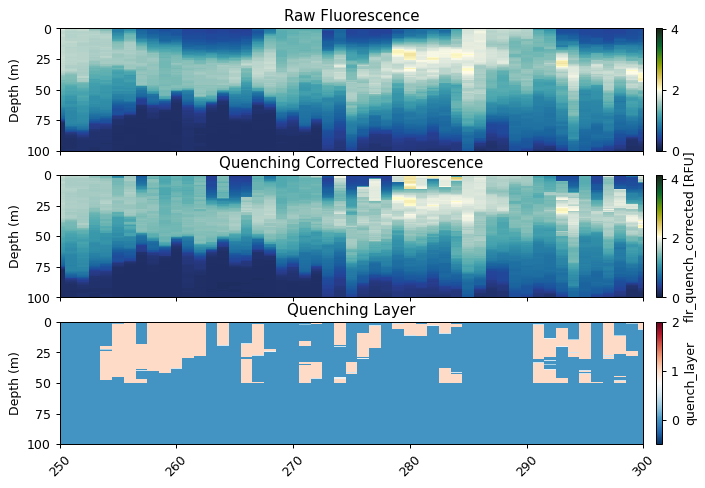

In [46]:
fig, ax = plt.subplots(3, 1, figsize=[9, 6], sharex=True, dpi=90)

gt.plot(dat_surf['profile_index'], dat_surf['depth'], flr_base, cmap=cmo.delta, ax=ax[0], robust=True)
gt.plot(dat_surf['profile_index'], dat_surf['depth'], flr_qc, cmap=cmo.delta, ax=ax[1], robust=True)
gt.plot(dat_surf['profile_index'], dat_surf['depth'], quench_layer, cmap=plt.cm.RdBu_r, ax=ax[2], vmin=-.5, vmax=2)

[a.set_xlabel('') for a in ax]
[a.set_ylim(100, 0) for a in ax]
[a.set_xlim(250, 300) for a in ax]

ax[0].set_title("Raw Fluorescence")
ax[1].set_title('Quenching Corrected Fluorescence')
ax[2].set_title('Quenching Layer')

plt.show()

In [ ]:
dat_surf['fluo_dark'] = ("time", flr_dark.data)
dat_surf['fluo_unquenched'] = ("time", flr_qc.data)

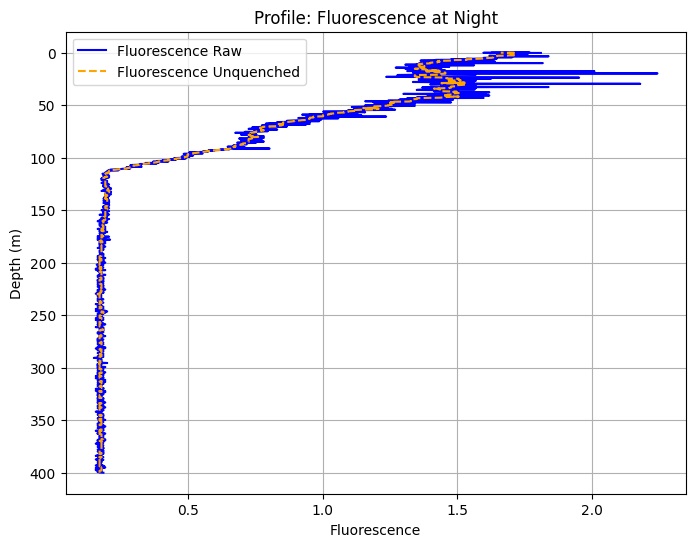

In [41]:
mask = (dat_surf.profile_index == 289).compute()
prof_i = dat_surf.where(mask, drop = True)

flr_raw = prof_i['fluo_dark']
flr_unquenched = prof_i['fluo_unquenched']
depths = prof_i['depth'].compute()

plt.figure(figsize=(8, 6))
plt.plot(flr_raw, depths, label='Fluorescence Raw', color='blue')
plt.plot(flr_unquenched, depths, label='Fluorescence Unquenched', color='orange', linestyle='--')

plt.gca().invert_yaxis()  # Depth increases downwards
plt.xlabel("Fluorescence")
plt.ylabel("Depth (m)")
plt.legend()
plt.title("Profile: Fluorescence at Night")
plt.grid(True)
plt.show()


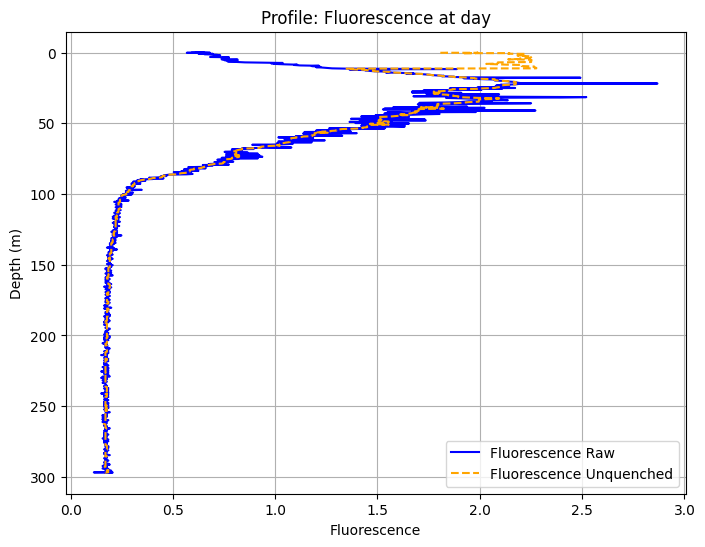

In [47]:
mask = (dat_surf.profile_index == 280).compute()
prof_i = dat_surf.where(mask, drop = True)

flr_raw = prof_i['fluo_dark']
flr_unquenched = prof_i['fluo_unquenched']
depths = prof_i['depth'].compute()

plt.figure(figsize=(8, 6))
plt.plot(flr_raw, depths, label='Fluorescence Raw', color='blue')
plt.plot(flr_unquenched, depths, label='Fluorescence Unquenched', color='orange', linestyle='--')

plt.gca().invert_yaxis()  # Depth increases downwards
plt.xlabel("Fluorescence")
plt.ylabel("Depth (m)")
plt.legend()
plt.title("Profile: Fluorescence at day")
plt.grid(True)
plt.show()

Satellite PAR matchup

In [49]:
import os

# Directory where your NetCDF files are stored (daily files)
ncdf_dir = "C:/Users/flapet/OneDrive - NOC/Documents/IDAPro/lib/db_building/data/satellite/par_mapped/"

# List all NetCDF files for the year (one file per day)
ncdf_files = sorted([f for f in os.listdir(ncdf_dir) if f.endswith('.nc')])

# Load the PAR data for each file and store it
daily_par_data = {}
for file in ncdf_files:
    # Open the dataset for the specific day
    ds = xr.open_dataset(os.path.join(ncdf_dir, file))
    
    # Extract PAR data (assuming it's named 'par', adjust if necessary)
    # Add a date key to use as the dictionary key for each day
    date = file.split('.')[1] # Extract the date from the filename (adjust based on filename format)
    
    # Store the data in a dictionary, with the date as the key
    daily_par_data[date] = ds["par"]  # Replace 'par' with the actual variable name in your files

# Example: inspect one of the datasets
print(daily_par_data["20240101"])  # Inspect the PAR data for January 1st, 2024

<xarray.DataArray 'par' (lat: 715, lon: 1468)> Size: 4MB
[1049620 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 3kB 70.03 69.99 69.95 69.9 ... 40.4 40.35 40.31 40.27
  * lon      (lon) float32 6kB -66.07 -66.03 -65.99 ... -5.024 -4.983 -4.941
Attributes:
    long_name:      Photosynthetically Available Radiation, R. Frouin
    units:          mol m^-2 day^-1
    standard_name:  surface_downwelling_photosynthetic_photon_flux_in_air
    valid_min:      -32750
    valid_max:      32250
    reference:      Frouin, R., Ligner, D.W., and Gautier, C., 1989: A Simple...
    display_scale:  linear
    display_min:    0.0
    display_max:    76.2


In [51]:
dat_surf

AttributeError: 'NoneType' object has no attribute 'render'

<xarray.Dataset> Size: 604MB
Dimensions:                (time: 2603917)
Coordinates:
  * time                   (time) datetime64[ns] 21MB 2024-05-28T12:11:31.942...
Data variables: (12/28)
    latitude               (time) float64 21MB dask.array<chunksize=(999,), meta=np.ndarray>
    longitude              (time) float64 21MB dask.array<chunksize=(999,), meta=np.ndarray>
    heading                (time) float64 21MB dask.array<chunksize=(999,), meta=np.ndarray>
    pitch                  (time) float64 21MB dask.array<chunksize=(999,), meta=np.ndarray>
    roll                   (time) float64 21MB dask.array<chunksize=(999,), meta=np.ndarray>
    waypoint_latitude      (time) float64 21MB dask.array<chunksize=(999,), meta=np.ndarray>
    ...                     ...
    potential_temperature  (time) float64 21MB dask.array<chunksize=(999,), meta=np.ndarray>
    profile_index          (time) float64 21MB dask.array<chunksize=(999,), meta=np.ndarray>
    profile_direction      (time) 

In [ ]:
from scipy.spatial import cKDTree
import datetime

# Function to find the nearest PAR value for each observation
def get_nearest_par(lat, lon, date_str, daily_par_data):
    # Check if the date is in the daily PAR data
    if date_str in daily_par_data and daily_par_data[date_str].size > 0:
        # Get PAR data for that date and find the nearest point
        par_data = daily_par_data[date_str]
        nearest_par = par_data.sel(lon=lon, lat=lat, method='nearest').values.flatten()[0]
    else:
        nearest_par = 0  # Default if no data for that date
    return nearest_par

In [98]:
lon = dat_surf['longitude'].data
lat = dat_surf['latitude'].data
time =  [datetime.datetime.utcfromtimestamp(t.astype('datetime64[s]').astype(int)).strftime("%Y%m%d") for t in dat_surf['time'].data]
prof_index = dat_surf['profile_index'].data

df = pd.DataFrame({'lon' : lon, 'lat' : lat, 'time' : time, 'profile_index' : prof_index})
profile_means = (
    df.groupby("profile_index")[["lat", "lon"]]
    .mean()
    .reset_index()
)

In [99]:
dates_series = df.groupby(['profile_index','time']).size().reset_index().rename(columns={0:'count'})


In [105]:
df_to_match = pd.merge(profile_means, dates_series, how='left',on=['profile_index'])

In [108]:
df_to_match.head()

,profile_index,lat,lon,time,count
0,-0.0,60.874868,-19.531325,20240528,573
1,-0.0,60.874868,-19.531325,20240529,189
2,-0.0,60.874868,-19.531325,20240530,366
3,-0.0,60.874868,-19.531325,20240531,540
4,-0.0,60.874868,-19.531325,20240601,402


In [ ]:
from tqdm import tqdm

# Step 3: Match PAR for each profile (with progress bar)
par_per_profile = []
for _, row in tqdm(df_to_macth.iterrows(), total=len(df_to_match)):
    nearest_par = get_nearest_par(row["lat"], row["lon"], row["time"], daily_par_data)
    par_per_profile.append(nearest_par)

# Add PAR to the profile_means DataFrame
df_to_match["PAR_matched"] = par_per_profile

# Step 4: Merge PAR values back into the original DataFrame
df = df.merge(df_to_match[["profile_index", "PAR_matched"]], on="profile_index")

df.drop_duplicates(subset=['profile_index'], inplace = True)


100%|██████████| 1889/1889 [00:12<00:00, 150.69it/s]


In [121]:
df.head()

,lon,lat,time,profile_index,PAR_matched
0,NaN,NaN,20240528,-0.0,17.309998
45012,-23.962178,59.946157,20240528,1.0,31.579998
54427,-23.958807,59.946010,20240528,2.0,31.579998
54883,-23.959520,59.947815,20240528,3.0,31.579998
60417,-23.954873,59.949193,20240528,4.0,31.579998


In [122]:
df_xr = df.to_xarray

In [128]:
# Ensure DataFrame has the profile_index and PAR columns
df = df[["profile_index", "PAR_matched"]]

# Step 1: Merge DataFrame with xarray dataset's profile_index as a DataFrame
dat_surf_df = dat_surf.to_dataframe().reset_index()

# Step 2: Perform a left join on profile_index
merged_df = dat_surf_df.merge(df, on="profile_index", how="left")

# Step 3: Convert the merged DataFrame back into xarray
dat_surf = merged_df.set_index(["time"]).to_xarray()

# Step 4: Ensure the new PAR column is added properly
dat_surf['PAR'] = dat_surf['PAR_matched']
dat_surf = dat_surf.drop_vars('PAR_matched')  # Optional: drop the extra 'par' column
